<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-Mixture-Model-(GMM)-in-scikit-learn" data-toc-modified-id="Gaussian-Mixture-Model-(GMM)-in-scikit-learn-1">Gaussian Mixture Model (GMM) in scikit-learn</a></span></li><li><span><a href="#GMM-cluster-simple-blob-data" data-toc-modified-id="GMM-cluster-simple-blob-data-2">GMM cluster simple blob data</a></span></li><li><span><a href="#GMM-for-density-estimation" data-toc-modified-id="GMM-for-density-estimation-3">GMM for density estimation</a></span></li><li><span><a href="#Model-Selection-with-AIC-or-BIC" data-toc-modified-id="Model-Selection-with-AIC-or-BIC-4">Model Selection with AIC or BIC</a></span></li></ul></div>

Gaussian Mixture Model (GMM) in scikit-learn
-----

GMM cluster simple blob data
-----

In [44]:
reset -fs

In [45]:
# Load data
import numpy as np

X = np.load("../data/gmm_data.npy") 

In [46]:
# Fit GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=1) # Start as single cluster
gmm.fit(X)

GaussianMixture()

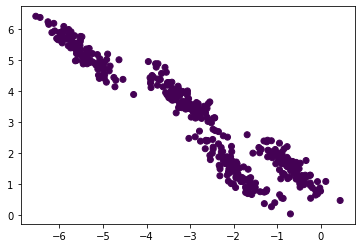

In [47]:
# Plot results
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [48]:
# TODO: 
# - Vary number of `n_components`. 
# - Plot each set of clusters for given n_components
# - What number of n_components makes the most sense to you and your peers?

In [49]:
# A solution

# for n in range(1, 11):
#     # Fit GMM
#     gmm = GaussianMixture(n_components=n)
#     gmm.fit(X)

#     # Plot results
#     labels = gmm.predict(X)
#     plt.scatter(X[:, 0], X[:, 1], c=labels);
#     plt.title(f"{n} clusters");
#     plt.show();
#     display.display(plt.gcf());
#     input('Press return to see next figure: ');
#     display.clear_output(wait=True);

GMM for density estimation
-----

Remember from the beginning of today's session, we often use a Gaussian distribution to model data.

Density estimation finds the center of "mass" for distribution. The model is simplification / compression of the raw data.

Use GMM as a collection of Gaussians to fit the data. Do __not__ separate each Gaussian into its own clusters. 

In [50]:
def draw_ellipse(position, covariance, ax=None, **kwargs) -> None:
    "Draw an ellipse with a given position and covariance"
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
    

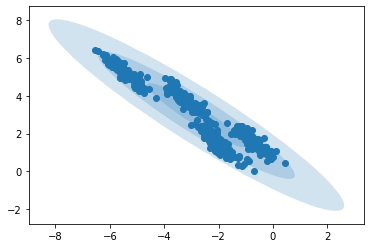

In [51]:
# Density estimations for simple blob data

n = 1
gmm = GaussianMixture(n_components=n)
gmm.fit(X)

plt.scatter(X[:, 0], X[:, 1])

# Draw a ellipse of equal likelihood around each Gaussian
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * 0.2 / gmm.weights_.max())

In [52]:
# Load data
X_complex = np.load("../data/slighlty_complex_data.npy") 

In [53]:
# TODO: 
# - Plot it (without clustering)
# - Predict how GMM density will group it. 
# - How will the the Gaussians change has number of componements increases?
# - How many Gaussians make the best model for this data?

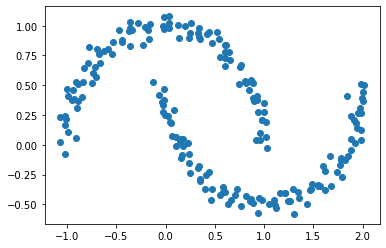

In [54]:
# A solution

plt.scatter(X_complex[:, 0], X_complex[:, 1]);

In [55]:
# # A solution
# for n in range(1, 20):
#     gmm = GaussianMixture(n_components=n)
#     gmm.fit(X)
#     plt.title(f"{n} Gaussians");
#     plt.scatter(X_complex[:, 0], X_complex[:, 1])

#     # Draw a ellipse of equal likelihood around each Gaussian
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * 0.2 / gmm.weights_.max())
#     plt.show();
#     display.display(plt.gcf());
#     input('Press return to see next figure: ');
#     display.clear_output();

Model Selection with AIC or BIC
----

Instead of guessing by visual inspection which model would be best, we can use Akaike information criterion (AIC) or the Bayesian information criterion (BIC) to do model selection.

In [56]:
aic = gmm.aic(X_complex)
print(f"{aic:,.2f}")

1,796.72


In [57]:
bic = gmm.bic(X_complex)
print(f"{bic:,.2f}")

1,813.21


In [58]:
# TODO: 
# - Fit a GMM with a variable number of n_components and compare model fits with AIC and BIC
# - What number of components makes the most sense?
# - Does the AIC / BIC number agree or disagree with your intuition?
# - Why would we choose to compare models with AIC / BIC vs. cross validation?

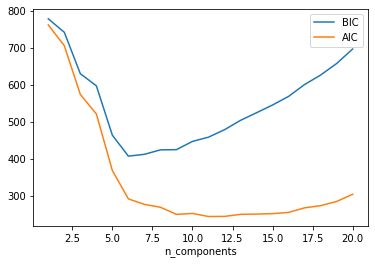

In [59]:
# A solution
n_components = np.arange(1, 21)
models = [GaussianMixture(n, random_state=0).fit(X_complex)
          for n in n_components]

plt.plot(n_components, [m.bic(X_complex) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_complex) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()
# Source - https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.ht

# Cross validation is our best estimate of how a model might generalize.  
# However, we might not have enough data to support cross validation or it might take too long to conduct cross validation.

<br>
<br> 
<br>

----